In [1]:
import shapely                 #needed to set geopandas geometry 
from shapely.wkt import loads  #needed to set geopandas geometry
import matplotlib.pyplot as plt
import matplotlib as mpl
import numpy as np
import geopandas as gpd
import pandas as pd
import os
import urllib
import zipfile
import re
from descartes import PolygonPatch
from pysal.model import mgwr
import pysal.lib
import libpysal as ps
from libpysal.weights.contiguity import Queen
from patsy import dmatrices
import statsmodels.api as sm
from statsmodels.stats.outliers_influence import variance_inflation_factor
# conda install mgwr
from mgwr.gwr import GWR, MGWR
from mgwr.sel_bw import Sel_BW
from mgwr.utils import shift_colormap, truncate_colormap
import warnings
#warnings.filterwarnings("ignore")

In [2]:
pip install matplotlib_scalebar

Note: you may need to restart the kernel to use updated packages.


In [3]:
from matplotlib_scalebar.scalebar import ScaleBar

In [4]:
df = pd.read_csv("C:/Users/samue/OneDrive - King's College London/Desktop/KCL Y3/Dissertation/1 Datasets/Python/Master (LSOA).csv", encoding= "unicode_escape") 

In [54]:
df.to_csv(r'correctdf.csv', index=False)

In [5]:
df.columns

Index(['LSOA Code', 'LSOA Name', 'LAD Code (2021 boundaries)',
       'LAD name (2021 boundaries)', 'geometry', 'X', 'Y', 'Pop', '<16', '>65',
       'POPDEN (km2)', 'AREA (m^2)', 'EthWhite', 'EthMixed', 'EthAsian',
       'EthBlack', 'UnE', 'LTHP', 'LTHP Prop', 'PoorHealth', 'PoorHealth Prop',
       'IncDeprived', 'MedianInc', 'MedianHousePrice', 'Aldi', 'ASDA',
       'Iceland', 'Lidl', 'Tesco', 'Sainsburys', 'Morrisons',
       'Marks and Spencer', 'The Co-operative Group', 'Waitrose', 'Total SM',
       'Greengrocer', 'ASDA_Delivery', 'Ice_Delivery', 'Sain_Delivery',
       'Mor_Delivery', 'Tesc_Delivery', 'Amaz_Delivery', 'Wait_Delivery',
       'Ocad_Delivery', 'Total Del', 'proximity', 'nearest budget',
       'nearest mid', 'nearest premium', 'variety', 'density'],
      dtype='object')

In [6]:
#correlation matrix

In [28]:
df_data = df[['proximity', 'EthWhite','EthMixed','EthAsian','EthBlack','UnE','LTHP Prop', 'PoorHealth Prop','MedianInc','MedianHousePrice']]

In [8]:
# Create a correlation matrix here using pandas
corr= df_data.corr()

In [9]:
# style it
corr.style.background_gradient(cmap='coolwarm')

In [10]:
x = ['EthWhite', 'EthMixed', 'EthAsian','EthBlack', 'UnE', 'LTHP Prop', 'PoorHealth Prop', 'MedianInc', 'MedianHousePrice'] # define input/independant variables
X = df.loc[:, x].dropna()
X = sm.add_constant(X)
y = np.array(df['proximity']) # define output/dependant variable

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
print(model.summary())

C:\Users\samue\anaconda3\envs\sds2021\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.178
Model:                            OLS   Adj. R-squared:                  0.176
Method:                 Least Squares   F-statistic:                     115.8
Date:                Sat, 04 Mar 2023   Prob (F-statistic):          1.48e-197
Time:                        17:45:49   Log-Likelihood:                -42049.
No. Observations:                4835   AIC:                         8.412e+04
Df Residuals:                    4825   BIC:                         8.418e+04
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
const             6868.1049    686.403  

In [13]:
gdf = gpd.GeoDataFrame(df)  #geopandas
gdf['geometry'] = gdf['geometry'].apply(lambda x: loads(x))  #from shapely
gdf = gdf.set_geometry('geometry')

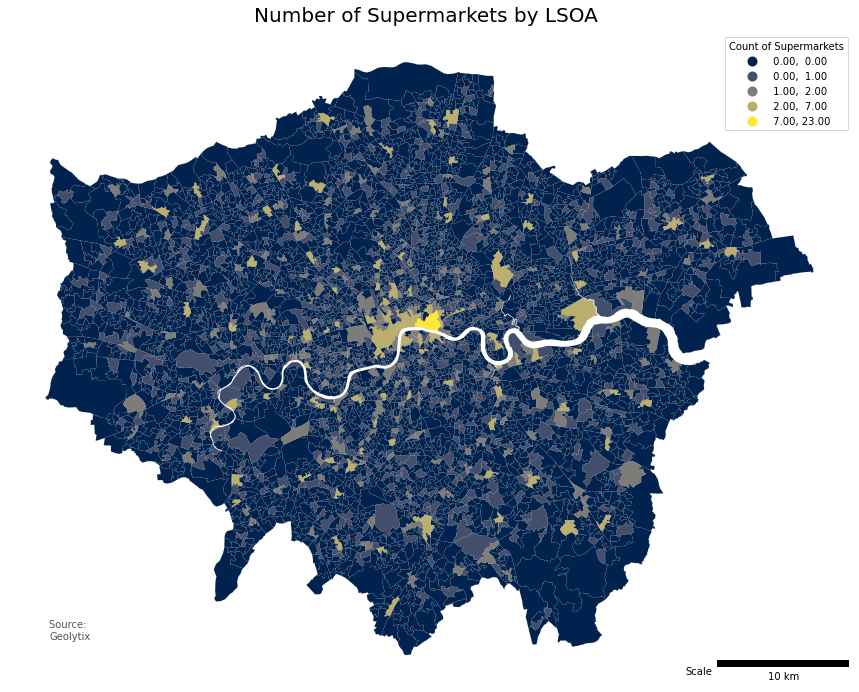

In [14]:
fig, ax1 = plt.subplots(1, figsize=(18, 12))  
gdf.plot(column='Total SM', ax=ax1, 
         scheme='fisherjenks', k=5, cmap='cividis',
         edgecolor='grey', linewidth=0.1,        #change line style
         legend=True, 
         legend_kwds={'title': "Count of Supermarkets",'loc': (0.85,0.85)} #legend settings
        ) 


#titles
plt.suptitle('Number of Supermarkets by LSOA', size=20, x=0.51, y=0.91) 

#add source info on the image itself
ax1.annotate('Source: \nGeolytix',
             xy=(0.05, 0.1), xycoords='axes fraction', 
             horizontalalignment='left', verticalalignment='top', 
             fontsize=10, color='#555555') 

scale1 = ScaleBar(
dx=1, label='Scale',
    location='lower right',  # in relation to the whole plot
    label_loc='left', scale_loc='bottom'  # in relation to the line
)

ax1.add_artist(scale1)

ax1.set_axis_off()

plt.savefig('FINAL_Number of Supermarkets by LSOA.png', dpi=1800)

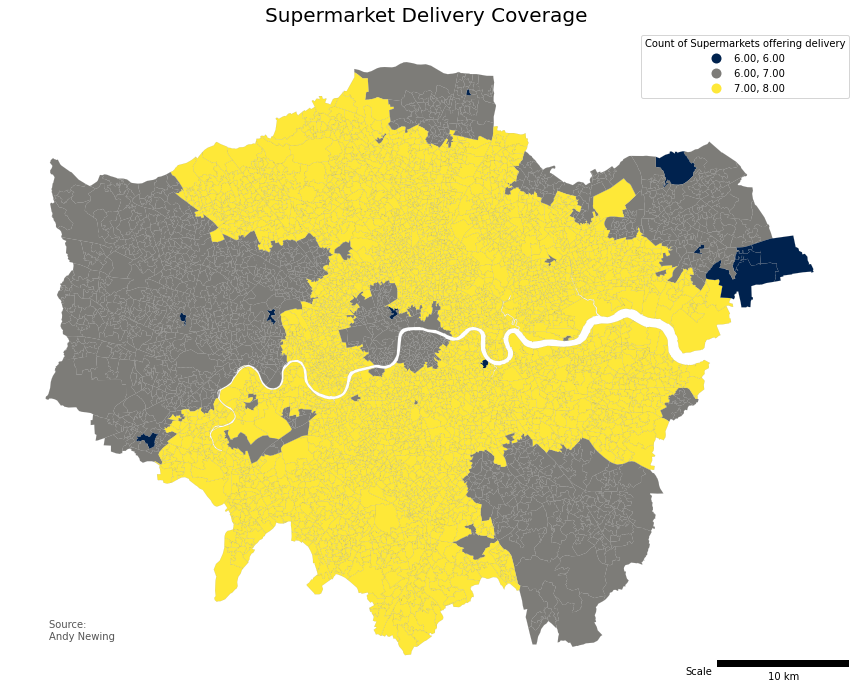

In [15]:
fig, ax1 = plt.subplots(1, figsize=(18, 12))  
gdf.plot(column='Total Del', ax=ax1, 
         scheme='fisherjenks', k=3, cmap='cividis',
         edgecolor='grey', linewidth=0.1,        #change line style
         legend=True, 
         legend_kwds={'title': "Count of Supermarkets offering delivery",'loc': (0.75,0.9)} #legend settings
        ) 


#titles
plt.suptitle('Supermarket Delivery Coverage', size=20, x=0.51, y=0.91) 

#add source info on the image itself
ax1.annotate('Source: \nAndy Newing',
             xy=(0.05, 0.1), xycoords='axes fraction', 
             horizontalalignment='left', verticalalignment='top', 
             fontsize=10, color='#555555')  

ax1.set_axis_off()

scale1 = ScaleBar(
dx=1, label='Scale',
    location='lower right',  # in relation to the whole plot
    label_loc='left', scale_loc='bottom'  # in relation to the line
)

ax1.add_artist(scale1)


plt.savefig('FINAL_Supermarket Del.png', dpi=1800)

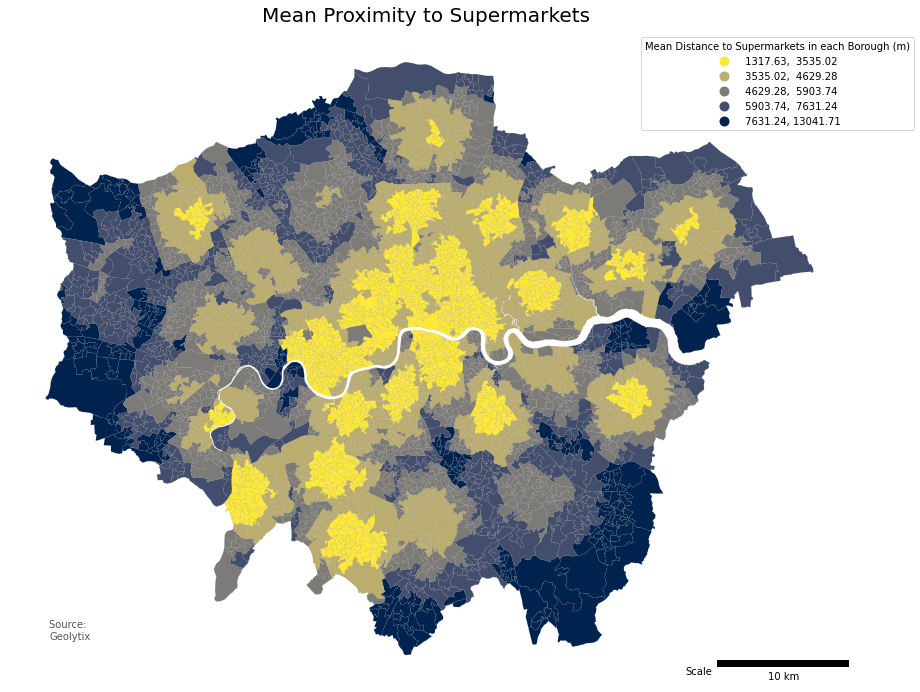

In [18]:
fig, ax1 = plt.subplots(1, figsize=(18, 12))  
gdf.plot(column='proximity', ax=ax1, 
         scheme='fisherjenks', k=5, cmap='cividis_r',
         edgecolor='grey', linewidth=0.1,        #change line style
         legend=True, 
         legend_kwds={'title': "Mean Distance to Supermarkets in each Borough (m)",'loc': (0.75,0.85)} #legend settings
        ) 


#titles
plt.suptitle('Mean Proximity to Supermarkets', size=20, x=0.51, y=0.91) 

#add source info on the image itself
ax1.annotate('Source: \nGeolytix',
             xy=(0.05, 0.1), xycoords='axes fraction', 
             horizontalalignment='left', verticalalignment='top', 
             fontsize=10, color='#555555')  

ax1.set_axis_off()

scale1 = ScaleBar(
dx=1, label='Scale',
    location='lower right',  # in relation to the whole plot
    label_loc='left', scale_loc='bottom'  # in relation to the line
)

ax1.add_artist(scale1)

plt.savefig('FINAL_Proximity.png', dpi=1800)

In [36]:
df['logproximity'] = np.log(df['proximity']) 

In [37]:
df['logEthMixed'] = np.log(df['EthMixed'])
df['logEthAsian'] = np.log(df['EthAsian'])
df['logEthBlack'] = np.log(df['EthBlack'])
df['logLTHP'] = np.log(df['LTHP Prop']) 
df['logMedianHousePrice'] = np.log(df['MedianHousePrice'])

In [40]:
df.head()

LSOA Code                  LSOA Name LAD Code (2021 boundaries)  \
0  E01000001        City of London 001A                  E09000001   
1  E01000002        City of London 001B                  E09000001   
2  E01000003        City of London 001C                  E09000001   
3  E01000005        City of London 001E                  E09000001   
4  E01000006  Barking and Dagenham 016A                  E09000002   

  LAD name (2021 boundaries)  \
0             City of London   
1             City of London   
2             City of London   
3             City of London   
4       Barking and Dagenham   

                                            geometry         X         Y  \
0  POLYGON ((532105.092 182011.230, 532162.491 18... -0.097060  51.51810   
1  POLYGON ((532746.813 181786.891, 532671.688 18... -0.091970  51.51868   
2  POLYGON ((532135.145 182198.119, 532158.250 18... -0.095230  51.52176   
3  POLYGON ((533807.946 180767.770, 533649.063 18... -0.076280  51.51452   
4  POLYGON ((545122.049 184314.931, 545271.917 18...  0.089318  51.53876   

     Pop  <16  >65  ...  nearest mid  nearest premium  variety  density  \
0  1,749  301  455  ...      457.012          631.642        1        2   
1  1,678  281  394  ...      947.444          680.435        0        0   
2  1,900  318  429  ...      732.531          932.351        0        0   
3  2,181  455  211  ...        0.000          303.737        2        3   
4  2,117  558  178  ...     1672.211         1282.940        0        0   

   logproximity  logEthMixed  logEthAsian  logEthBlack   logLTHP  \
0      7.183593    -3.300626    -4.891715    -2.437580 -2.373049   
1      7.223042    -3.280633    -5.903316    -2.715740 -2.448624   
2      7.385850    -3.197559    -3.482948    -2.080929 -1.981265   
3      7.277913    -2.815104    -2.684440    -1.279514 -2.456430   
4      8.460168    -3.379704    -2.113461    -0.682052 -2.349488   

   logMedianHousePrice  
0            13.132313  
1            13.171154  
2            12.765688  
3            12.611538  
4            12.390475  

[5 rows x 57 columns]

In [42]:
x = ['EthWhite', 'logEthMixed', 'logEthAsian','logEthBlack', 'UnE', 'logLTHP', 'PoorHealth Prop', 'MedianInc', 'logMedianHousePrice'] # define input/independant variables
X = df.loc[:, x].dropna()
X = sm.add_constant(X)
y = np.array(df['logproximity']) # define output/dependant variable

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.181
Model:                            OLS   Adj. R-squared:                  0.180
Method:                 Least Squares   F-statistic:                     118.5
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          8.57e-202
Time:                        22:53:48   Log-Likelihood:                -958.44
No. Observations:                4835   AIC:                             1937.
Df Residuals:                    4825   BIC:                             2002.
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  10.7541    

C:\Users\samue\anaconda3\envs\sds2021\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [44]:
#suppress scientific notation
import numpy as np
np.set_printoptions(suppress=True)

#create instance of influence
influence = model.get_influence()

#obtain Cook's distance for each observation
cooks = influence.cooks_distance

#display Cook's distances
cooks

(array([0.01120425, 0.01159901, 0.00403387, ..., 0.00046911, 0.00148438,
        0.0001445 ]),
 array([1.        , 0.99999999, 1.        , ..., 1.        , 1.        ,
        1.        ]))

In [45]:
OLSsummary = influence.summary_frame()
OLSsummary

dfb_const  dfb_EthWhite  dfb_logEthMixed  dfb_logEthAsian  \
0     -0.161812      0.055307        -0.040939         0.065752   
1     -0.171135      0.119138        -0.089269         0.160144   
2     -0.104914     -0.016324        -0.012208        -0.013511   
3     -0.069394     -0.006647        -0.034510         0.022567   
4      0.002399     -0.000876        -0.005038         0.001297   
...         ...           ...              ...              ...   
4830   0.009528     -0.003619        -0.018759         0.012132   
4831   0.007658     -0.084638        -0.039399         0.025366   
4832   0.018665      0.005271        -0.025669         0.029404   
4833   0.024849     -0.058678        -0.045133         0.033646   
4834  -0.000159     -0.000469         0.006165         0.003295   

      dfb_logEthBlack   dfb_UnE  dfb_logLTHP  dfb_PoorHealth Prop  \
0           -0.002300 -0.122833    -0.073965             0.008753   
1            0.061315 -0.058446    -0.011204            -0.061258   
2           -0.051905 -0.046353    -0.042551            -0.031252   
3           -0.047575 -0.079751     0.002794            -0.005514   
4            0.004268  0.006621    -0.000080            -0.002890   
...               ...       ...          ...                  ...   
4830        -0.009237  0.023797    -0.068342             0.017366   
4831        -0.092317 -0.012271    -0.020103            -0.015723   
4832         0.006150  0.004419    -0.011346             0.033429   
4833        -0.067729 -0.020386    -0.027815             0.005950   
4834        -0.003839 -0.012555     0.010738             0.008222   

      dfb_MedianInc  dfb_logMedianHousePrice   cooks_d  standard_resid  \
0         -0.286552                 0.208062  0.011204       -3.523162   
1         -0.241079                 0.215822  0.011599       -3.331987   
2         -0.183150                 0.136829  0.004034       -3.000045   
3         -0.118842                 0.094815  0.002605       -3.100328   
4          0.006490                -0.004393  0.000025        0.393875   
...             ...                      ...       ...             ...   
4830       0.024035                -0.036115  0.001237        1.918574   
4831       0.026747                -0.016280  0.002052        2.134754   
4832       0.043473                -0.037140  0.000469        1.472895   
4833       0.039301                -0.040690  0.001484        1.927846   
4834       0.007146                 0.002187  0.000145        1.065201   

      hat_diag  dffits_internal  student_resid    dffits  
0     0.008946        -0.334727      -3.527337 -0.335124  
1     0.010340        -0.340573      -3.335481 -0.340930  
2     0.004462        -0.200845      -3.002536 -0.201012  
3     0.002703        -0.161394      -3.103099 -0.161538  
4     0.001596         0.015747       0.393841  0.015746  
...        ...              ...            ...       ...  
4830  0.003349         0.111219       1.919107  0.111250  
4831  0.004482         0.143240       2.135541  0.143292  
4832  0.002158         0.068491       1.473074  0.068500  
4833  0.003978         0.121835       1.928389  0.121869  
4834  0.001272         0.038014       1.065216  0.038014  

[4835 rows x 16 columns]

In [46]:
#identifying rows of data with outliers/cook's distance > 4/n
thres = 4/4835 #4/n
influentialdata = OLSsummary["cooks_d"] > thres
np.where(influentialdata)[0]

array([   0,    1,    2,    3,   44,  117,  125,  132,  133,  150,  184,
        201,  208,  248,  324,  351,  357,  383,  384,  403,  410,  416,
        440,  458,  459,  460,  461,  462,  463,  464,  540,  541,  557,
        576,  640,  641,  642,  643,  644,  645,  665,  669,  673,  674,
        706,  708,  709,  714,  722,  724,  725,  729,  732,  733,  734,
        773,  782,  866,  867,  998,  999, 1002, 1003, 1009, 1011, 1036,
       1037, 1038, 1053, 1057, 1060, 1061, 1073, 1075, 1314, 1316, 1336,
       1347, 1348, 1357, 1396, 1401, 1487, 1552, 1579, 1653, 1654, 1655,
       1656, 1657, 1704, 1706, 1809, 1820, 1839, 1840, 1843, 1853, 1861,
       1866, 2174, 2176, 2267, 2298, 2307, 2308, 2315, 2316, 2386, 2388,
       2391, 2392, 2395, 2397, 2421, 2423, 2424, 2425, 2426, 2430, 2440,
       2454, 2475, 2487, 2488, 2489, 2490, 2513, 2516, 2517, 2518, 2521,
       2536, 2539, 2546, 2548, 2628, 2651, 2747, 2748, 2750, 2751, 2752,
       2757, 2774, 2822, 2836, 2838, 2842, 2857, 28

In [47]:
df.drop([0,    1,    2,    3,   44,  117,  125,  132,  133,  150,  184, 201,  208,  248,  324,  351,  357,  383,  384,  403,  410,  416, 440,  458,  459,  460,  461,  462,  463,  464,  540,  541,  557, 576,  640,  641,  642,  643,  644,  645,  665,  669,  673,  674, 706,  708,  709,  714,  722,  724,  725,  729,  732,  733,  734, 773,  782,  866,  867,  998,  999, 1002, 1003, 1009, 1011, 1036, 1037, 1038, 1053, 1057, 1060, 1061, 1073, 1075, 1314, 1316, 1336, 1347, 1348, 1357, 1396, 1401, 1487, 1552, 1579, 1653, 1654, 1655, 1656, 1657, 1704, 1706, 1809, 1820, 1839, 1840, 1843, 1853, 1861, 1866, 2174, 2176, 2267, 2298, 2307, 2308, 2315, 2316, 2386, 2388, 2391, 2392, 2395, 2397, 2421, 2423, 2424, 2425, 2426, 2430, 2440, 2454, 2475, 2487, 2488, 2489, 2490, 2513, 2516, 2517, 2518, 2521, 2536, 2539, 2546, 2548, 2628, 2651, 2747, 2748, 2750, 2751, 2752, 2757, 2774, 2822, 2836, 2838, 2842, 2857, 2888, 2905, 2906, 2924, 2946, 2949, 3003, 3281, 3353, 3486, 3712, 3714, 3716, 3717, 3718, 3741, 3747, 3767, 3782, 3857, 3858, 3890, 3895, 3912, 3918, 3942, 3971, 3975, 3976, 3977, 4001, 4004, 4005, 4057, 4058, 4067, 4068, 4069, 4110, 4158, 4161, 4172, 4175, 4178, 4181, 4196, 4212, 4214, 4215, 4298, 4463, 4532, 4566, 4567, 4568, 4569, 4570, 4572, 4652, 4674, 4675, 4689, 4691, 4692, 4694, 4711, 4714, 4719, 4723, 4748, 4760, 4761, 4762, 4764, 4765, 4769, 4770, 4812, 4816, 4818, 4819, 4821, 4824, 4827, 4828, 4829, 4830, 4831, 4833 ], axis=0, inplace=True)

In [48]:
x = ['EthWhite', 'logEthMixed', 'logEthAsian','logEthBlack', 'UnE', 'logLTHP', 'PoorHealth Prop', 'MedianInc', 'logMedianHousePrice'] # define input/independant variables
X = df.loc[:, x].dropna()
X = sm.add_constant(X)
y = np.array(df['logproximity']) # define output/dependant variable

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.234
Model:                            OLS   Adj. R-squared:                  0.232
Method:                 Least Squares   F-statistic:                     155.6
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          1.27e-257
Time:                        22:57:20   Log-Likelihood:                -455.50
No. Observations:                4596   AIC:                             931.0
Df Residuals:                    4586   BIC:                             995.3
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  11.1432    

C:\Users\samue\anaconda3\envs\sds2021\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [50]:
df_final = df[['LSOA Code','LSOA Name','geometry', 'X', 'Y', 'Pop', 'logproximity', 'EthWhite', 'logEthAsian', 'UnE', 'logLTHP', 'PoorHealth Prop', 'logMedianHousePrice','Aldi','ASDA','Iceland','Lidl','Tesco','Sainsburys','Morrisons','Marks and Spencer','The Co-operative Group','Waitrose','Total SM','ASDA_Delivery','Ice_Delivery','Sain_Delivery','Mor_Delivery','Tesc_Delivery','Amaz_Delivery', 'Wait_Delivery','Ocad_Delivery','Total Del', 'nearest budget','nearest mid','nearest premium']]

In [51]:
df_final.to_csv('proxdfarcgis.csv')

In [52]:
x = ['EthWhite', 'logEthAsian', 'UnE', 'logLTHP', 'PoorHealth Prop', 'logMedianHousePrice'] # define input/independant variables
X = df_final.loc[:, x].dropna()
X = sm.add_constant(X)
y = np.array(df_final['logproximity']) # define output/dependant variable

# Note the difference in argument order
model = sm.OLS(y, X).fit()
predictions = model.predict(X) # make the predictions by the model

# Print out the statistics
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                      y   R-squared:                       0.211
Model:                            OLS   Adj. R-squared:                  0.210
Method:                 Least Squares   F-statistic:                     204.7
Date:                Tue, 07 Mar 2023   Prob (F-statistic):          5.54e-232
Time:                        22:58:55   Log-Likelihood:                -522.91
No. Observations:                4596   AIC:                             1060.
Df Residuals:                    4589   BIC:                             1105.
Df Model:                           6                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
const                  12.2938    

C:\Users\samue\anaconda3\envs\sds2021\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [53]:
X = df_final[['EthWhite', 'logEthAsian', 'UnE', 'logLTHP', 'PoorHealth Prop', 'logMedianHousePrice']]   # independent variables
y = df_final['logproximity']   # dependent variables
X = sm.add_constant(X)
# fit the regression model
reg = sm.OLS(y, X).fit()
# get Variance Inflation Factor (VIF) 
pd.DataFrame({'variables':X.columns[1:], 'VIF':[variance_inflation_factor(X.values, i+1) for i in range(len(X.columns[1:]))]})

C:\Users\samue\anaconda3\envs\sds2021\lib\site-packages\statsmodels\tsa\tsatools.py:142: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


variables       VIF
0             EthWhite  1.924567
1          logEthAsian  2.673908
2                  UnE  3.444726
3              logLTHP  3.345867
4      PoorHealth Prop  4.652658
5  logMedianHousePrice  1.675135

In [29]:
#GWR

In [157]:
df_final = df

In [158]:
df_final.to_csv(r'GWR_prox.csv', index=False)

## End here

In [77]:
# Let's check the CRS - we need projected CRS for calculating the spatial weight
LSOA_shp.crs

<Projected CRS: EPSG:27700>
Name: OSGB 1936 / British National Grid
Axis Info [cartesian]:
- E[east]: Easting (metre)
- N[north]: Northing (metre)
Area of Use:
- name: United Kingdom (UK) - offshore to boundary of UKCS within 49°45'N to 61°N and 9°W to 2°E; onshore Great Britain (England, Wales and Scotland). Isle of Man onshore.
- bounds: (-9.0, 49.75, 2.01, 61.01)
Coordinate Operation:
- name: British National Grid
- method: Transverse Mercator
Datum: OSGB 1936
- Ellipsoid: Airy 1830
- Prime Meridian: Greenwich

In [134]:
# Building the Geographically Weighted Regression Model
model = mgwr.gwr.GWR(g_coords, # a collection of n sets of x and y coordinates
                     g_y, # dependent variable
                     g_X, # independent variables
                     bw.bw[0]) # bandwidth value  ( we use N nearest neighbours)

In [135]:
# Fit the model with particular estimations 
results = model.fit()
results.summary()

Model type                                                         Gaussian
Number of observations:                                                4596
Number of covariates:                                                     7

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                           3625.621
Log-likelihood:                                                   -5976.446
AIC:                                                              11966.893
AICc:                                                             11968.924
BIC:                                                             -35073.148
R2:                                                                   0.211
Adj. R2:                                                              0.210

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [136]:
# Filtering only significant result at 0.05 (95% confidence interval)
filtered_estimates = results.filter_tvals(alpha=.05)
filtered_estimates

array([[ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.        ,  0.        ,  2.5473267 , ...,  0.        ,
         0.        ,  0.        ],
       ...,
       [ 0.        ,  0.        ,  0.        , ...,  0.        ,
         0.        ,  0.        ],
       [ 4.05634365,  0.        ,  0.        , ..., -2.28454484,
         2.20744644,  0.        ],
       [ 2.68025046,  2.84511036,  0.        , ...,  2.43218315,
        -2.25986427,  0.        ]])

In [137]:
#visualising GWR model

In [138]:
# Convert arrays to data frame
data_params = pd.DataFrame(filtered_estimates)
data_localR2 = pd.DataFrame(results.localR2)

In [139]:
data_localR2.describe()

0
count  4596.000000
mean      0.685832
std       0.134629
min      -0.743910
25%       0.613339
50%       0.708881
75%       0.781027
max       0.952470

In [140]:
# Create the new dataframe 
df1=pd.DataFrame(df_final["LSOA Code"])
df2 = df1.assign(intercept=data_params[0],
                 EthWhite=data_params[1],
                 logEthAsian=data_params[2],
                 UnE=data_params[3],
                 logLTHP=data_params[4],
                 PoorHealthProp=data_params[5],
                 logMedianHousePrice=data_params[6],
                 localR2=data_localR2[0])
df2.columns
df2

LSOA Code  intercept  EthWhite  logEthAsian  UnE  logLTHP  \
4     E01000006   0.000000       0.0     0.000000  0.0      0.0   
5     E01000007   0.000000       0.0     0.000000  0.0      0.0   
6     E01000008   0.000000       0.0     2.560563  0.0      0.0   
7     E01000009   0.000000       0.0     0.000000  0.0      0.0   
8     E01000010  -2.964363       0.0     0.000000  0.0      0.0   
...         ...        ...       ...          ...  ...      ...   
4823  E01033735        NaN       NaN          NaN  NaN      NaN   
4825  E01033737        NaN       NaN          NaN  NaN      NaN   
4826  E01033738        NaN       NaN          NaN  NaN      NaN   
4832  E01033744        NaN       NaN          NaN  NaN      NaN   
4834  E01033746        NaN       NaN          NaN  NaN      NaN   

      PoorHealthProp  logMedianHousePrice   localR2  
4                0.0                  0.0  0.694376  
5                0.0                  0.0  0.630392  
6                0.0                  0.0  0.724257  
7                0.0                  0.0  0.554499  
8                0.0                  0.0  0.378414  
...              ...                  ...       ...  
4823             NaN                  NaN       NaN  
4825             NaN                  NaN       NaN  
4826             NaN                  NaN       NaN  
4832             NaN                  NaN       NaN  
4834             NaN                  NaN       NaN  

[4596 rows x 9 columns]

In [141]:
LSOA_shp

OBJECTID   LSOA11CD                   LSOA11NM  \
0            5  E01000006  Barking and Dagenham 016A   
1            6  E01000007  Barking and Dagenham 015A   
2            7  E01000008  Barking and Dagenham 015B   
3            8  E01000009  Barking and Dagenham 016B   
4            9  E01000010  Barking and Dagenham 015C   
...        ...        ...                        ...   
4591     32811  E01033735             Greenwich 004G   
4592     32813  E01033737             Greenwich 004I   
4593     32814  E01033738             Greenwich 037D   
4594     32820  E01033744             Greenwich 007G   
4595     32822  E01033746             Greenwich 038E   

                      LSOA11NMW   BNG_E   BNG_N      LONG       LAT  \
0     Barking and Dagenham 016A  544994  184276  0.089318  51.53876   
1     Barking and Dagenham 015A  544189  184454  0.077792  51.54057   
2     Barking and Dagenham 015B  543576  184276  0.068886  51.53913   
3     Barking and Dagenham 016B  544588  184434  0.083533  51.54029   
4     Barking and Dagenham 015C  544299  184019  0.079199  51.53663   
...                         ...     ...     ...       ...       ...   
4591             Greenwich 004G  543453  178908  0.064931  51.49092   
4592             Greenwich 004I  543349  179145  0.063530  51.49308   
4593             Greenwich 037D  540268  178412  0.018887  51.48726   
4594             Greenwich 007G  544561  179303  0.081041  51.49419   
4595             Greenwich 038E  538053  177160 -0.013480  51.47656   

         Shape__Are   Shape__Len  ... PoorHealthProp_y logMedianHousePrice_y  \
0     130551.387161  1716.896118  ...              0.0                   0.0   
1     191313.039268  1811.549048  ...              0.0                   0.0   
2     203647.039703  2850.028656  ...              0.0                   0.0   
3     139114.189934  1486.060320  ...              0.0                   0.0   
4     332048.940910  2383.002918  ...              0.0                   0.0   
...             ...          ...  ...              ...                   ...   
4591  125787.015869  1533.062948  ...              NaN                   NaN   
4592  238404.921089  2585.817958  ...              NaN                   NaN   
4593  324792.912178  2612.921596  ...              NaN                   NaN   
4594  167366.995415  1665.991740  ...              NaN                   NaN   
4595  118096.183182  1468.475945  ...              NaN                   NaN   

      localR2_y          0         1         2         3         4         5  \
0      0.694376   3.852308 -1.488154  0.503736  0.361681 -0.433119 -0.103508   
1      0.630392   6.751297 -0.093726  1.399227  0.686034 -0.060447 -0.814552   
2      0.724257   5.334217 -1.176528  2.547327  1.978301 -1.191505 -0.072692   
3      0.554499   6.752681 -0.467282  1.010558  0.757347 -0.172915 -0.658432   
4      0.378414   5.023604 -0.225509  0.644701  0.916607 -0.578988 -0.359561   
...         ...        ...       ...       ...       ...       ...       ...   
4591        NaN   8.000317  0.470365  0.923031 -0.726808 -2.813559  2.097226   
4592        NaN   8.095742  0.618502  1.303591 -0.702774 -3.014757  2.139168   
4593        NaN   5.918769 -0.769717 -1.564724  1.051639 -0.192769  0.013893   
4594        NaN   7.397342  0.501048  0.150557 -1.950454 -2.284545  2.207446   
4595        NaN  10.409243  2.845110 -1.580481  3.010380  2.432183 -2.259864   

             6  
0     0.109757  
1     0.639065  
2     1.102258  
3     0.486174  
4     0.095386  
...        ...  
4591  1.536302  
4592  1.585486  
4593  0.709079  
4594 -0.922869  
4595 -0.843943  

[4596 rows x 36 columns]

In [147]:
LSOA_shp=gpd.read_file('Lower_Layer_Super_Output_Areas_(December_2011)_Boundaries_Super_Generalised_Clipped_(BSC)_EW_V3.shp')

In [148]:
# Merge our shapefile with the model's results
LSOA_shp = LSOA_shp.merge(df2, left_on='LSOA11CD', right_on='LSOA Code')
LSOA_shp.head()

OBJECTID   LSOA11CD                   LSOA11NM                  LSOA11NMW  \
0         5  E01000006  Barking and Dagenham 016A  Barking and Dagenham 016A   
1         6  E01000007  Barking and Dagenham 015A  Barking and Dagenham 015A   
2         7  E01000008  Barking and Dagenham 015B  Barking and Dagenham 015B   
3         8  E01000009  Barking and Dagenham 016B  Barking and Dagenham 016B   
4         9  E01000010  Barking and Dagenham 015C  Barking and Dagenham 015C   

    BNG_E   BNG_N      LONG       LAT     Shape__Are   Shape__Len  \
0  544994  184276  0.089318  51.53876  130551.387161  1716.896118   
1  544189  184454  0.077792  51.54057  191313.039268  1811.549048   
2  543576  184276  0.068886  51.53913  203647.039703  2850.028656   
3  544588  184434  0.083533  51.54029  139114.189934  1486.060320   
4  544299  184019  0.079199  51.53663  332048.940910  2383.002918   

                                            geometry  LSOA Code  intercept  \
0  POLYGON ((545271.918 184183.948, 545296.314 18...  E01000006   0.000000   
1  POLYGON ((544348.715 184573.710, 544358.001 18...  E01000007   0.000000   
2  POLYGON ((543619.802 184826.112, 543595.300 18...  E01000008   0.000000   
3  POLYGON ((544787.820 184604.870, 544697.230 18...  E01000009   0.000000   
4  POLYGON ((544456.630 184300.602, 544736.189 18...  E01000010  -2.964363   

   EthWhite  logEthAsian  UnE  logLTHP  PoorHealthProp  logMedianHousePrice  \
0       0.0     0.000000  0.0      0.0             0.0                  0.0   
1       0.0     0.000000  0.0      0.0             0.0                  0.0   
2       0.0     2.560563  0.0      0.0             0.0                  0.0   
3       0.0     0.000000  0.0      0.0             0.0                  0.0   
4       0.0     0.000000  0.0      0.0             0.0                  0.0   

    localR2  
0  0.694376  
1  0.630392  
2  0.724257  
3  0.554499  
4  0.378414

In [149]:
#Download to shapefile here

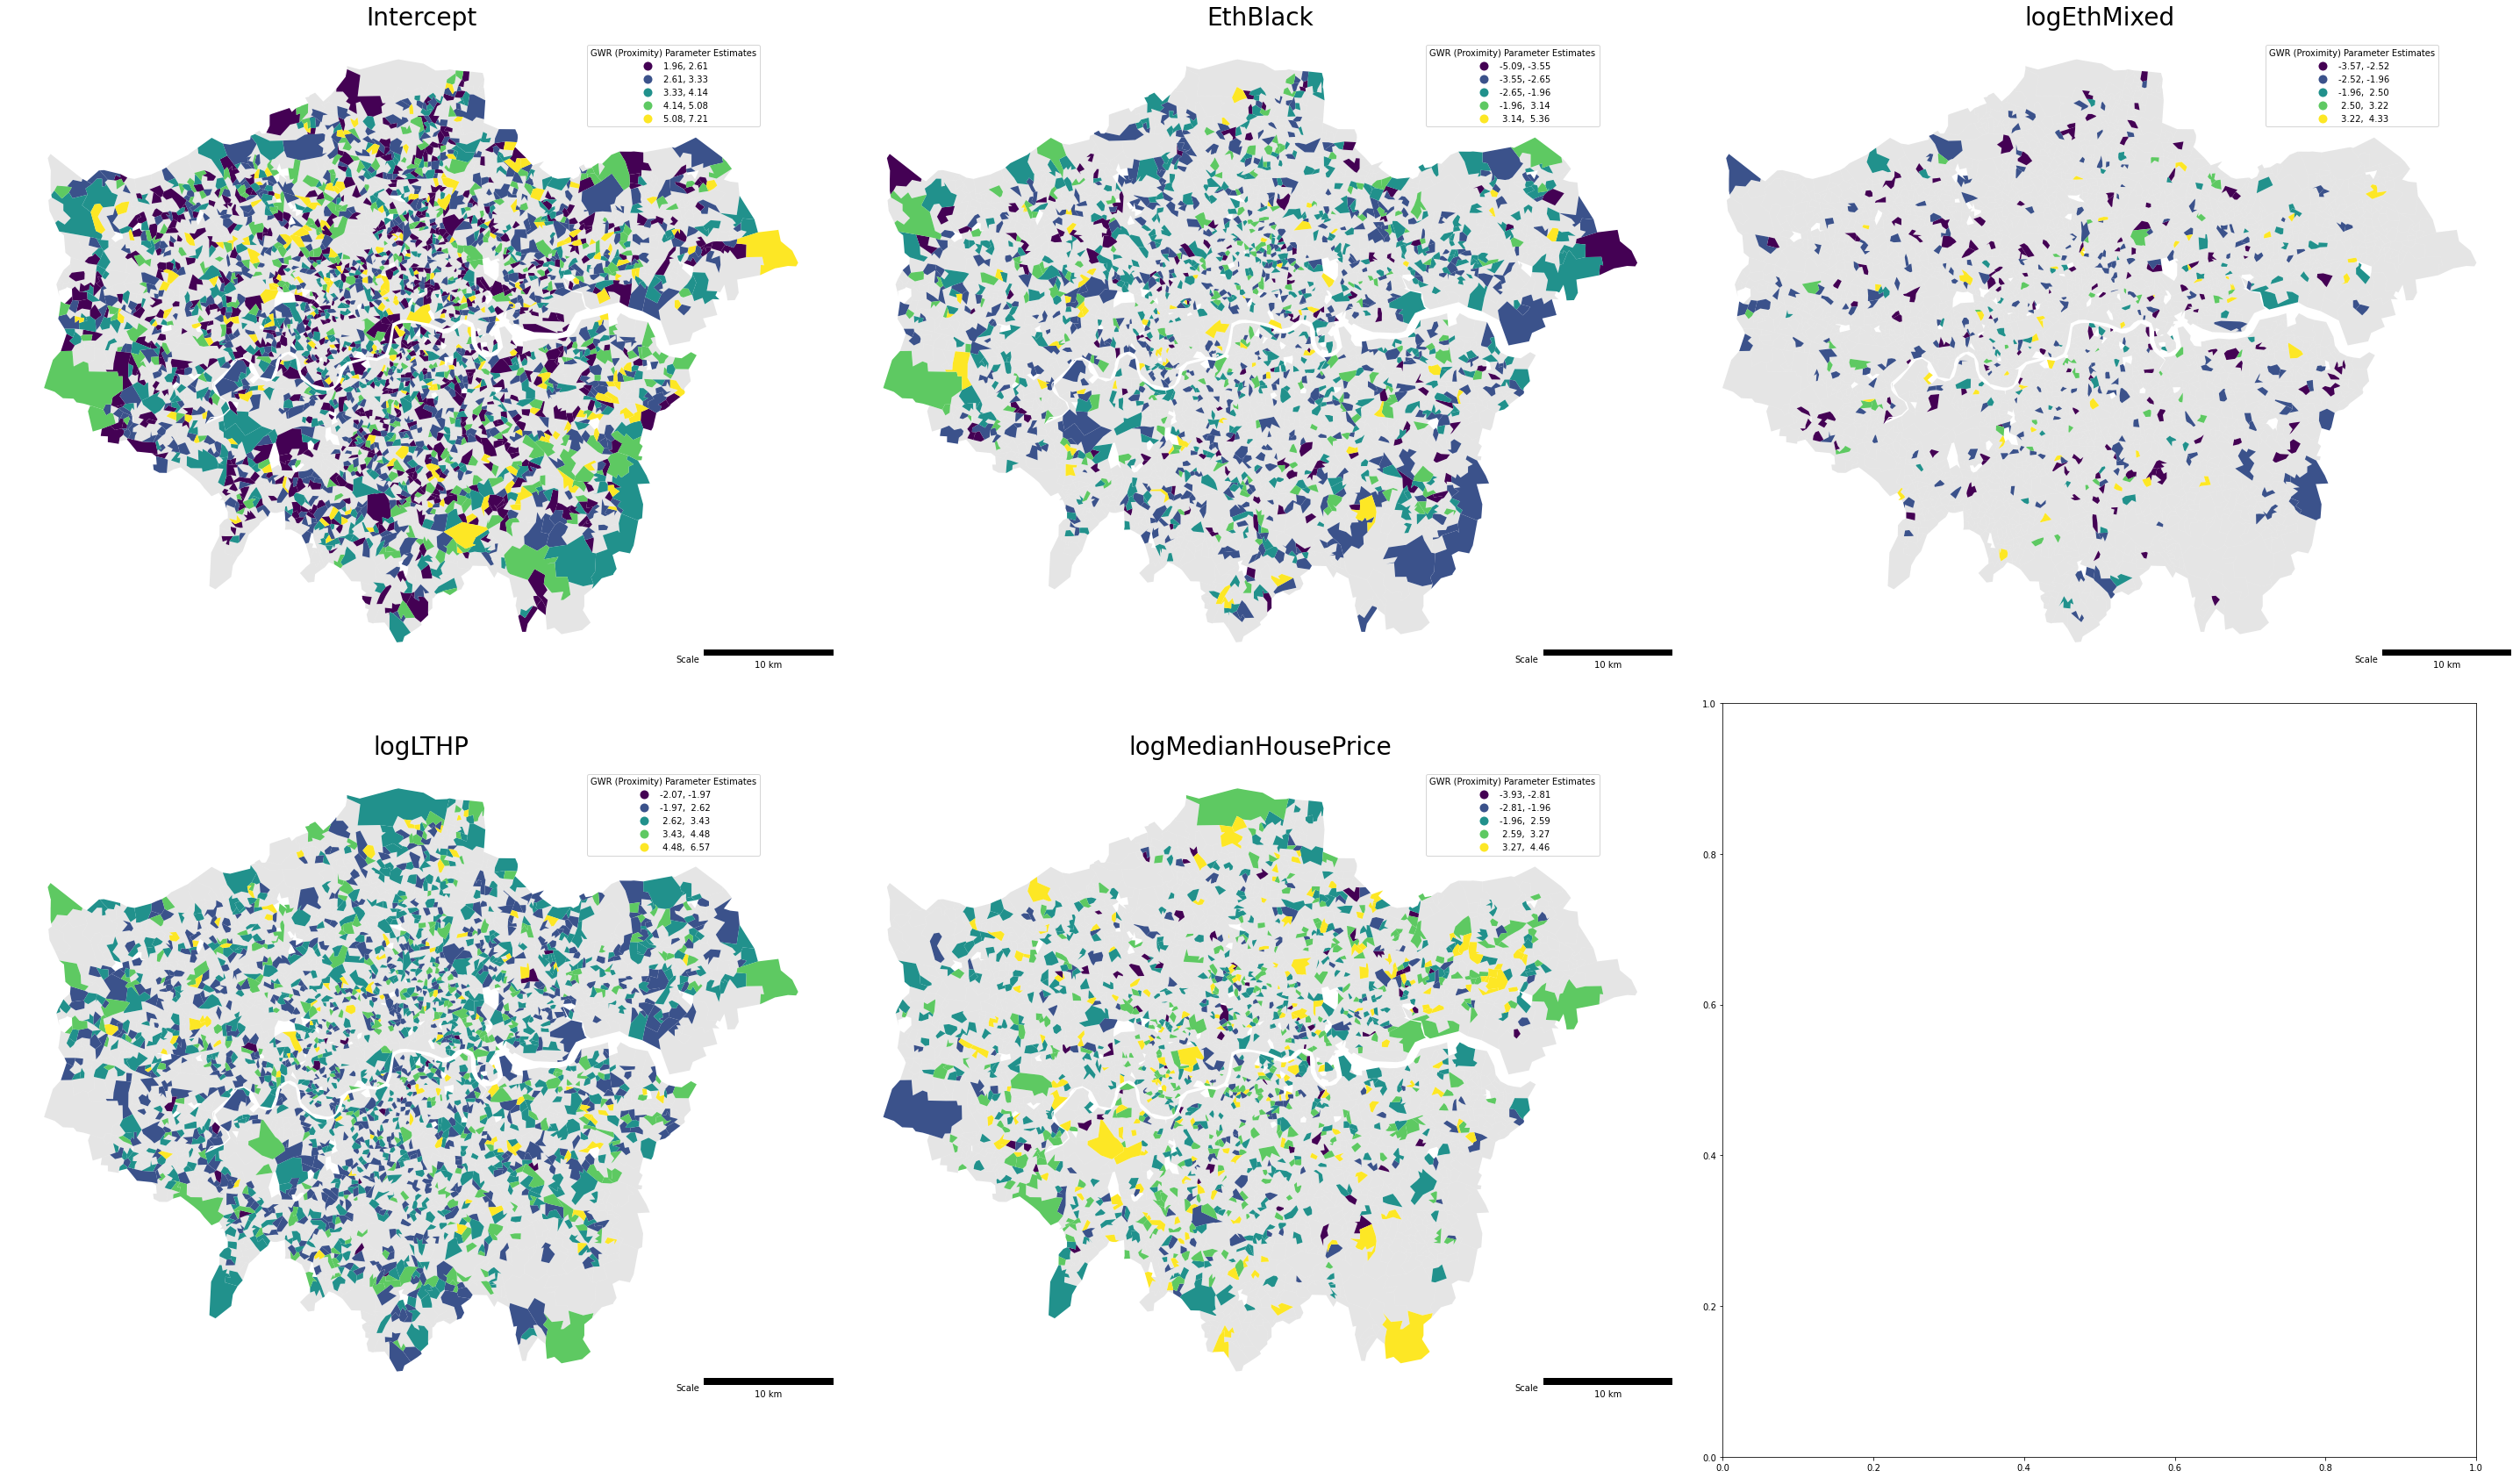

In [72]:
# First, let's create empty set of subplots with 2 rows and 3 columns
f,ax=plt.subplots(2,3,figsize=(40,24), subplot_kw=dict(aspect='equal'))
# Flatten them
ax = ax.flatten()
# Define the title of our plots
titles = ['Intercept', 'EthBlack', 'logEthMixed', 'logLTHP', 'logMedianHousePrice']

# Here, we are creating loop for our parameter estimates 
for i,row in enumerate(filtered_estimates.T):
    # We want to plot all the non-significant estimates in grey
    LSOA_temp = LSOA_shp.assign(toplot=filtered_estimates.T[i])
    ( LSOA_temp.query('toplot==0')
     .sort_values('toplot')
     .plot(color='grey',ax=ax[i],alpha=.2))
    # and assign colours only to the significant estimates
    ( LSOA_temp.query('toplot!=0')
     .sort_values('toplot')
     .plot('toplot',
           cmap='viridis',
           ax=ax[i],
           scheme = 'FisherJenks', 
           k=5,
           legend=True,
           legend_kwds={'title': "GWR (Proximity) Parameter Estimates",'loc': (0.70,0.85)}))
    
    ax[i].set_title(titles[i], fontsize=28)
    ax[i].set_axis_off()
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    ax[i].add_artist(ScaleBar(1, label='Scale', location='lower right', label_loc='left', scale_loc='bottom'))

 

f.tight_layout()

plt.show()
#plt.savefig('GWR_Prox.png', dpi=1600)
    

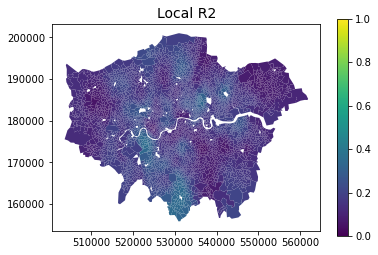

In [90]:
# For the last one, local R2, we can just map all of them regarding the significance
(LSOA_shp.assign(r2=results.localR2)
 .sort_values('r2')
 .plot('r2',
       legend=True,
       vmin=0,
       vmax=1,
       cmap='viridis'))
    
plt.title('Local R2', size=14)

f.tight_layout()
    
plt.show()

#building MGWR

#Prepare dataset inputs
g_y = df_final['logproximity'].values.reshape((-1,1))
g_X = df_final[['EthBlack', 'logEthMixed', 'logLTHP', 'logMedianHousePrice', 'logIncDeprived']].values
u = df_final['X']
v = df_final['Y']
g_coords = list(zip(u,v))

# Standardised our data to have mean of 0 and standard deviation of 1
g_X = (g_X - g_X.mean(axis=0)) / g_X.std(axis=0)
g_y = g_y.reshape((-1,1))
g_y = (g_y - g_y.mean(axis=0)) / g_y.std(axis=0)

In [93]:
#Calibrate GWR model

gwr_selector = Sel_BW(g_coords, g_y, g_X)
gwr_bw = gwr_selector.search(bw_min=2)
print(gwr_bw)
gwr_results = GWR(g_coords, g_y, g_X, gwr_bw).fit()

255.0


In [94]:
#Calibrate MGWR model

mgwr_selector = Sel_BW(g_coords, g_y, g_X, multi=True)
mgwr_bw = mgwr_selector.search(multi_bw_min=[2])
print(mgwr_bw)
mgwr_results = MGWR(g_coords, g_y, g_X, mgwr_selector).fit()

Backfitting:   0%|          | 0/200 [00:00<?, ?it/s]

[  20. 3942. 2790. 4760. 2334. 4760.]


Inference:   0%|          | 0/1 [00:00<?, ?it/s]

In [95]:
#gwr results
gwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                4761
Number of covariates:                                                     6

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                           4307.533
Log-likelihood:                                                   -6517.296
AIC:                                                              13046.592
AICc:                                                             13048.616
BIC:                                                             -35958.820
R2:                                                                   0.095
Adj. R2:                                                              0.094

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [96]:
# show mgwr result here
mgwr_results.summary()

Model type                                                         Gaussian
Number of observations:                                                4761
Number of covariates:                                                     6

Global Regression Results
---------------------------------------------------------------------------
Residual sum of squares:                                           4307.533
Log-likelihood:                                                   -6517.296
AIC:                                                              13046.592
AICc:                                                             13048.616
BIC:                                                             -35958.820
R2:                                                                   0.095
Adj. R2:                                                              0.094

Variable                              Est.         SE  t(Est/SE)    p-value
------------------------------- ---------- ---------- ------

In [97]:
# Filtering only significant result at 0.05 (95% confidence interval)
mgwr_filtered_estimates = mgwr_results.filter_tvals(alpha=.05)
mgwr_filtered_estimates

array([[-2.06482827, -4.693658  ,  0.        , 10.50083047,  5.19952683,
        -4.0168183 ],
       [ 0.        , -4.71170647,  0.        , 10.50308038,  5.11810388,
        -4.01687461],
       [-2.2110157 , -4.69559978,  0.        , 10.50111475,  5.1698086 ,
        -4.01477748],
       ...,
       [ 0.        , -4.97081961,  0.        , 10.48179706,  0.        ,
        -4.02982966],
       [ 0.        , -4.97905474,  0.        , 10.47340231,  0.        ,
        -4.02719216],
       [ 0.        , -4.91763212,  0.        , 10.50940462,  2.07745825,
        -4.04019005]])

In [98]:
#Add GWR parameters to GeoDataframe
LSOA_shp['gwr_intercept'] = gwr_results.params[:,0]
LSOA_shp['gwr_EthBlack'] = gwr_results.params[:,1]
LSOA_shp['gwr_logEthMixed'] = gwr_results.params[:,2]
LSOA_shp['gwr_logLTHP'] = gwr_results.params[:,3]
LSOA_shp['gwr_logMedianHousePrice'] = gwr_results.params[:,4]
LSOA_shp['gwr_logIncDeprived'] = gwr_results.params[:,5]

#Obtain t-vals filtered based on multiple testing correction
gwr_filtered_t = gwr_results.filter_tvals()

In [99]:
#Add MGWR parameters to GeoDataframe
LSOA_shp['mgwr_intercept'] = mgwr_results.params[:,0]
LSOA_shp['mgwr_EthBlack'] = mgwr_results.params[:,1]
LSOA_shp['mgwr_logEthMixed'] = mgwr_results.params[:,2]
LSOA_shp['mgwr_logLTHP'] = mgwr_results.params[:,3]
LSOA_shp['mgwr_logMedianHousePrice'] = mgwr_results.params[:,4]
LSOA_shp['mgwr_logIncDeprived'] = mgwr_results.params[:,5]

#Obtain t-vals filtered based on multiple testing correction
mgwr_filtered_t = mgwr_results.filter_tvals()

In [100]:
LSOA_shp

OBJECTID   LSOA11CD                   LSOA11NM  \
0            1  E01000001        City of London 001A   
1            2  E01000002        City of London 001B   
2            3  E01000003        City of London 001C   
3            5  E01000006  Barking and Dagenham 016A   
4            6  E01000007  Barking and Dagenham 015A   
...        ...        ...                        ...   
4756     32818  E01033742             Greenwich 007F   
4757     32819  E01033743             Greenwich 002H   
4758     32820  E01033744             Greenwich 007G   
4759     32821  E01033745             Greenwich 002I   
4760     32822  E01033746             Greenwich 038E   

                      LSOA11NMW   BNG_E   BNG_N      LONG       LAT  \
0           City of London 001A  532129  181625 -0.097060  51.51810   
1           City of London 001B  532480  181699 -0.091970  51.51868   
2           City of London 001C  532245  182036 -0.095230  51.52176   
3     Barking and Dagenham 016A  544994  184276  0.089318  51.53876   
4     Barking and Dagenham 015A  544189  184454  0.077792  51.54057   
...                         ...     ...     ...       ...       ...   
4756             Greenwich 007F  544575  179604  0.081366  51.49689   
4757             Greenwich 002H  545669  180548  0.097505  51.50509   
4758             Greenwich 007G  544561  179303  0.081041  51.49419   
4759             Greenwich 002I  546105  179884  0.103508  51.49901   
4760             Greenwich 038E  538053  177160 -0.013480  51.47656   

         Shape__Are   Shape__Len  ... gwr_logEthMixed gwr_logLTHP  \
0     157794.481079  1685.391778  ...       -0.250488    0.191036   
1     164882.427628  1804.828196  ...       -0.304864    0.198657   
2      42219.805717   909.223277  ...       -0.304000    0.208611   
3     130551.387161  1716.896118  ...       -0.110137    0.169284   
4     191313.039268  1811.549048  ...       -0.090365    0.182481   
...             ...          ...  ...             ...         ...   
4756  124241.242340  1548.430416  ...       -0.107204    0.119072   
4757  922082.974510  4713.934618  ...       -0.358015   -0.022793   
4758  167366.995415  1665.991740  ...       -0.066419    0.127176   
4759  573963.488342  3868.525357  ...       -0.276705   -0.055563   
4760  118096.183182  1468.475945  ...       -0.091672    0.211868   

      gwr_logMeanFinal  gwr_logIncDeprived  mgwr_intercept  mgwr_EthBlack  \
0            -0.062758           -0.197057       -0.517287      -0.179178   
1            -0.095532           -0.186946       -0.468132      -0.180568   
2            -0.037825           -0.191225       -0.551393      -0.179461   
3             0.166975            0.186934        0.733156      -0.194027   
4             0.115459            0.155763        0.735953      -0.193616   
...                ...                 ...             ...            ...   
4756          0.108155            0.126547        0.383828      -0.195004   
4757          0.147395            0.388088        0.109532      -0.195193   
4758          0.108883            0.113632        0.352504      -0.195081   
4759          0.169052            0.433473        0.192986      -0.195503   
4760         -0.127571           -0.267390       -0.196824      -0.192080   

      mgwr_logEthMixed  mgwr_logLTHP  mgwr_logMeanFinal  mgwr_logIncDeprived  
0            -0.005581      0.189022           0.160384            -0.104815  
1            -0.007199      0.188987           0.157425            -0.104769  
2            -0.006881      0.189025           0.159182            -0.104757  
3            -0.054464      0.188587          -0.007679            -0.103928  
4            -0.051887      0.188599          -0.004503            -0.103928  
...                ...           ...                ...                  ...  
4756         -0.049317      0.188527          -0.005716            -0.104322  
4757         -0.053856      0.188528          -0.009898            -0.104215  
4758         -0

C:\Users\samue\anaconda3\envs\sds2021\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\samue\anaconda3\envs\sds2021\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(
C:\Users\samue\anaconda3\envs\sds2021\lib\site-packages\geopandas\plotting.py:678: UserWarning: The GeoDataFrame you are attempting to plot is empty. Nothing has been displayed.
  warnings.warn(


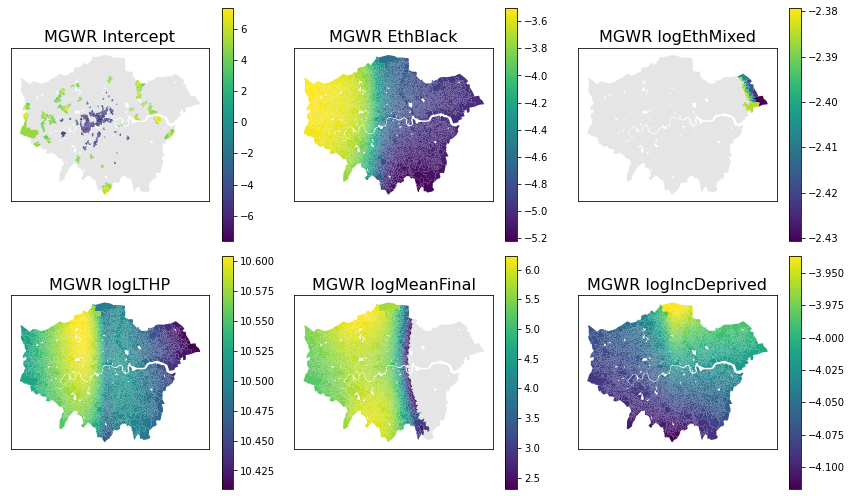

In [101]:
# First, let's create empty set of subplots with 2 rows and 3 columns
f,ax=plt.subplots(2,3, figsize=(12,7), subplot_kw=dict(aspect='equal'))
# Flatten them
ax = ax.flatten()
# Define the title of our plots
titles = ['MGWR Intercept','MGWR EthBlack', 'MGWR logEthMixed', 'MGWR logLTHP', 'MGWR logMedianHousePrice', 'MGWR logIncDeprived']

# Here, we are creating loop for our parameter estimates 
for i,row in enumerate(mgwr_filtered_t.T):
    # We want to plot all the non-significant estimates in grey
    LSOA_temp = LSOA_shp.assign(toplot=mgwr_filtered_t.T[i])
    (LSOA_temp.query('toplot==0')
     .sort_values('toplot')
     .plot(color='grey',ax=ax[i],alpha=.2))
    # and assign colours only to the significant estimates
    (LSOA_temp.query('toplot!=0')
     .sort_values('toplot')
     .plot('toplot',
           cmap='viridis',
           ax=ax[i],
           legend=True))
    
    ax[i].set_title(titles[i], fontsize=16)
    
    ax[i].set_xticklabels([])
    ax[i].set_yticklabels([])
    ax[i].set_xticks([])
    ax[i].set_yticks([])
    
ax[-1].set_xticklabels([])
ax[-1].set_yticklabels([])
ax[-1].set_xticks([])
ax[-1].set_yticks([])
    
f.tight_layout()
    
plt.show()
    